## 1. Edge Detector Kernel 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d

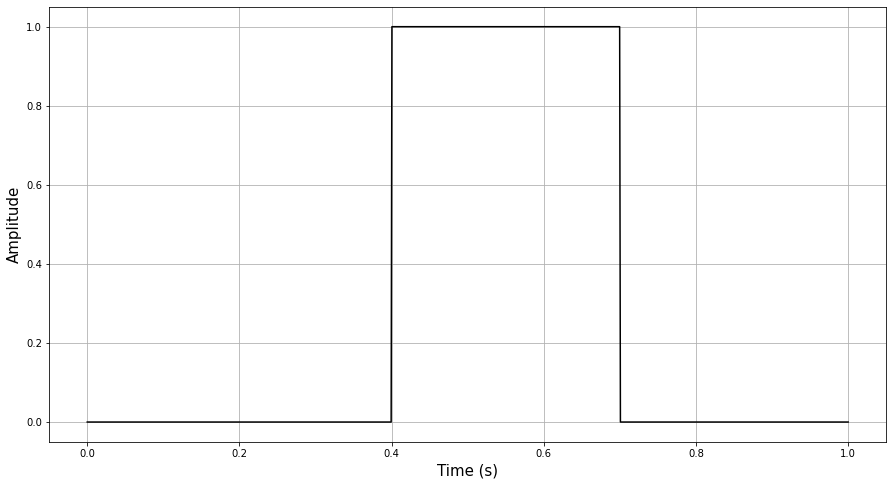

In [2]:
sample_rate = 1000 #Hz
signal = np.append(np.zeros(400) , np.ones(300))
signal = np.append(signal , np.zeros(300))
Npnts = len(signal)
time = 1/sample_rate*Npnts
timevec = np.linspace(0 , time , Npnts)

plt.figure(figsize = (15,8))
plt.plot(timevec , signal , c='black')
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.grid()

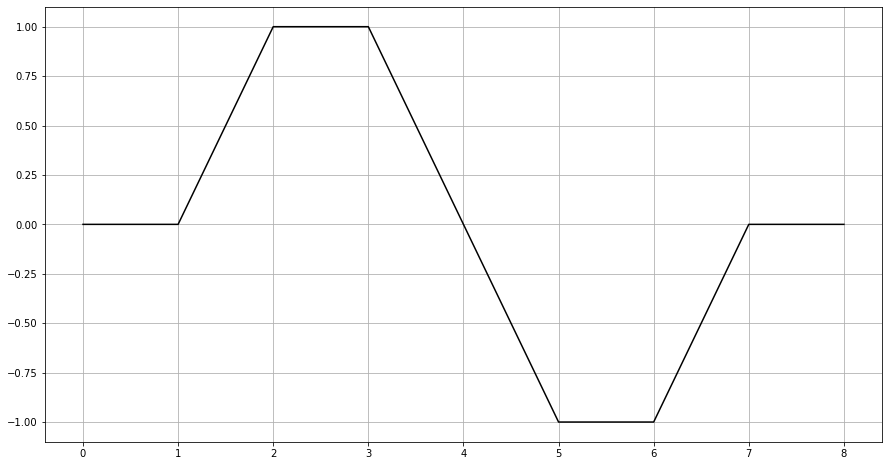

In [3]:
#Creating a kernel for edge detection: 
kernel = np.array([0 , 0 , 1 , 1  , 0 , -1 , -1 , 0 , 0])
plt.figure(figsize = (15,8))
plt.plot(kernel, c='black')
plt.grid()

In [4]:
kernel_mid_index = int((len(kernel) - 1)/2)
    
signal_pad = np.append(np.zeros(len(kernel)) , signal)
signal_pad = np.append(signal_pad , np.zeros(len(kernel)))
    
kernel_flip = kernel[::-1]

signal_conv = np.zeros(len(signal) + len(kernel) - 1)
signal_pad_conv = np.zeros(len(signal_pad)) 
for i in range(0 , len(signal_pad)-len(kernel_flip)):
    signal_pad_conv[i] = signal_pad[i:i+len(kernel_flip)].dot(kernel_flip) 
signal_conv = signal_pad_conv[1:len(signal)+len(kernel)]
timevec_conv = np.linspace(-kernel_mid_index*1/sample_rate , time+kernel_mid_index*1/sample_rate , len(signal_conv))

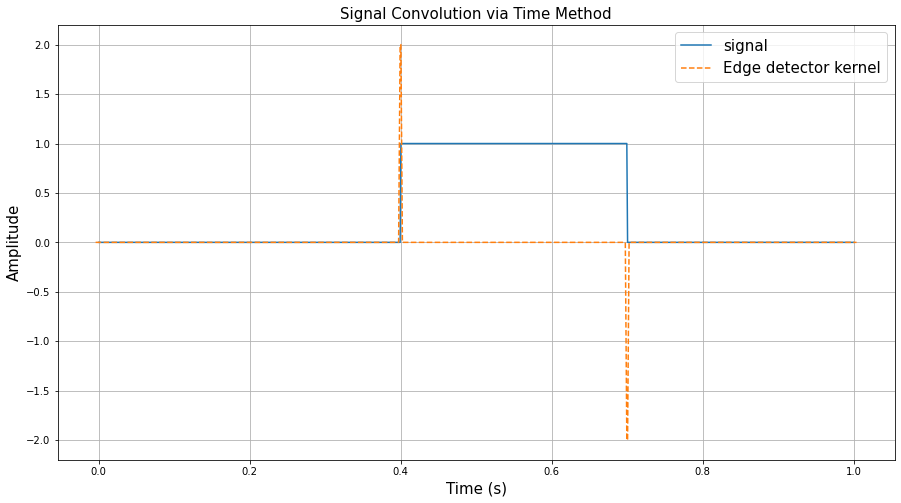

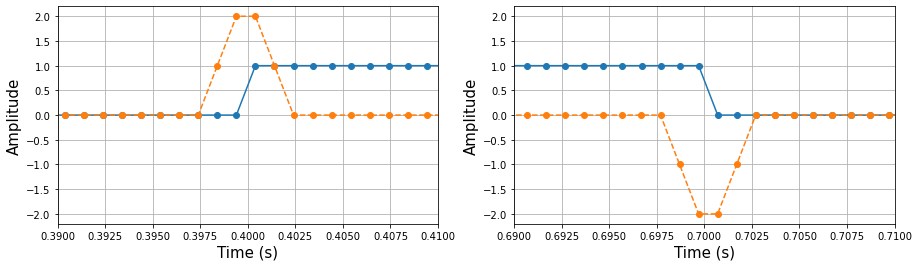

In [5]:
plt.figure(figsize = (15,8))
plt.plot(timevec , signal , label='signal')
plt.plot(timevec_conv , signal_conv , linestyle = 'dashed' , label='Edge detector kernel' )
plt.title('Signal Convolution via Time Method' , fontsize = 15)
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.plot(timevec , signal , marker = 'o')
plt.plot(timevec_conv , signal_conv , linestyle = 'dashed' , marker = 'o' )
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.xlim([0.39 , 0.41])
plt.grid()

plt.subplot(1,2,2)
plt.plot(timevec , signal , marker = 'o')
plt.plot(timevec_conv , signal_conv , linestyle = 'dashed' , marker = 'o' )
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.xlim([0.69 , 0.71])
plt.grid()

  ## 2. Convolution Theorem

In [6]:
Nconv = len(signal)+len(kernel)-1
hz = np.linspace(0 , sample_rate , Nconv)
kernel_fft = (np.fft.fft(kernel , Nconv))
signal_fft = (np.fft.fft(signal , Nconv))
sig_conv_fft = kernel_fft * signal_fft
sig_conv = np.real(np.fft.ifft(sig_conv_fft))

(0.0, 500.0)

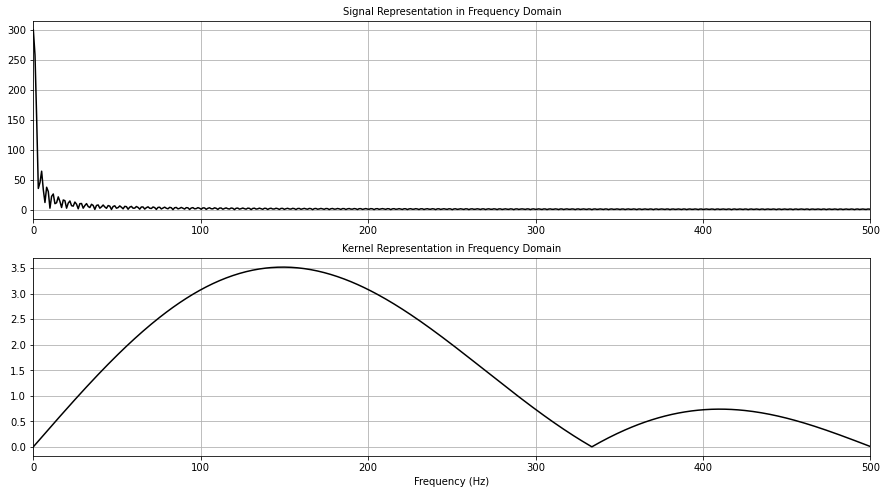

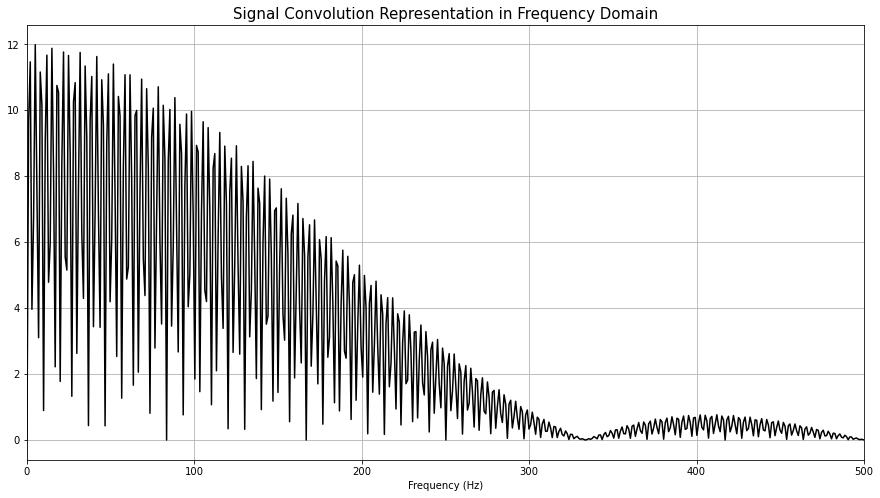

In [7]:
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.plot(hz , np.abs(signal_fft), c='black')
plt.title('Signal Representation in Frequency Domain' , fontsize = 10)
plt.grid()
plt.xlim([0,500])

plt.subplot(2,1,2)
plt.plot(hz , np.abs(kernel_fft), c='black')
plt.xlabel('Frequency (Hz)', fontsize = 10)
plt.title('Kernel Representation in Frequency Domain', fontsize = 10)
plt.grid()
plt.xlim([0,500])

plt.figure(figsize = (15,8))
plt.plot(hz , np.abs(sig_conv_fft ), c='black')
plt.xlabel('Frequency (Hz)', fontsize = 10)
plt.title('Signal Convolution Representation in Frequency Domain', fontsize = 15)
plt.grid()
plt.xlim([0,500])

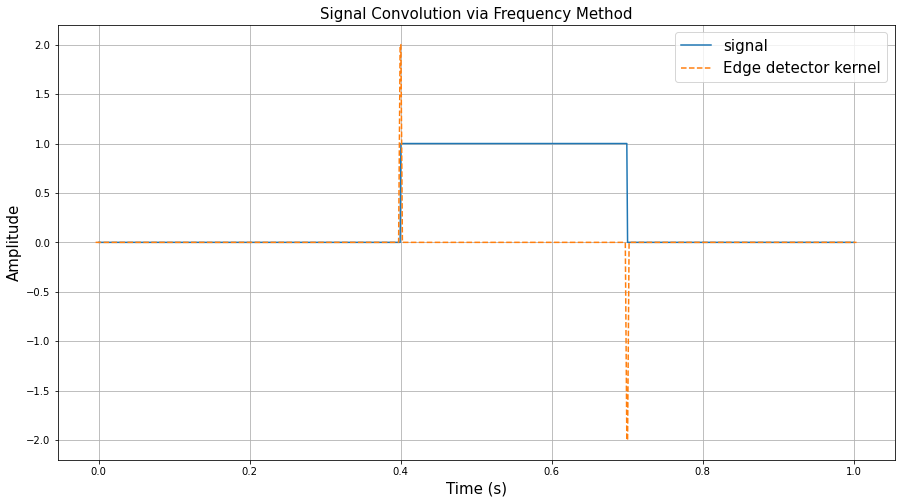

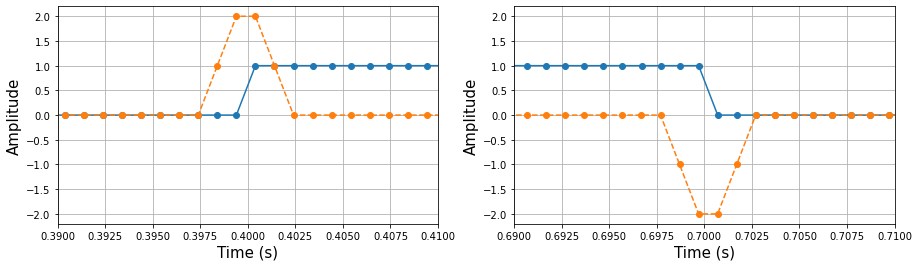

In [8]:
plt.figure(figsize = (15,8))
plt.plot(timevec , signal , label='signal')
plt.plot(timevec_conv , sig_conv , linestyle = 'dashed' , label='Edge detector kernel' )
plt.title('Signal Convolution via Frequency Method' , fontsize = 15)
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.plot(timevec , signal , marker = 'o')
plt.plot(timevec_conv , sig_conv , linestyle = 'dashed' , marker = 'o' )
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.xlim([0.39 , 0.41])
plt.grid()

plt.subplot(1,2,2)
plt.plot(timevec , signal , marker = 'o')
plt.plot(timevec_conv , sig_conv , linestyle = 'dashed' , marker = 'o' )
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.xlim([0.69 , 0.71])
plt.grid()

## 3. Convolution with time-domain Gaussian (smoothing filter)

In [9]:
sample_rate = 1000 
timevec = np.arange(0 , 3 , 1/sample_rate)
Npnts = len(timevec)
Poles = 25 
freq = 70 #Hz

x0 = np.arange(0 , Poles)
y0 = np.random.randn(Poles)
x_test = np.linspace(1,Poles-1,Npnts)
signal_amp = interp1d(x0 , y0)(x_test)
Noise = 5*np.random.randn(Npnts)
Signal = signal_amp + Noise

hz = np.linspace(1,sample_rate , Npnts)
Signal_fft = np.abs(np.fft.fft(Signal)/Npnts)**2
Noise_fft = np.abs(np.fft.fft(Noise)/Npnts)**2
sig_amp_fft = np.abs(np.fft.fft(signal_amp)/Npnts)**2

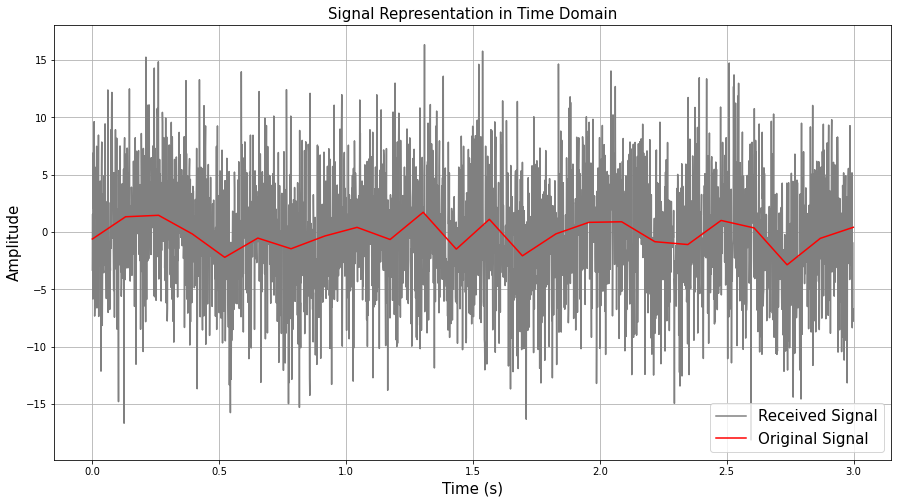

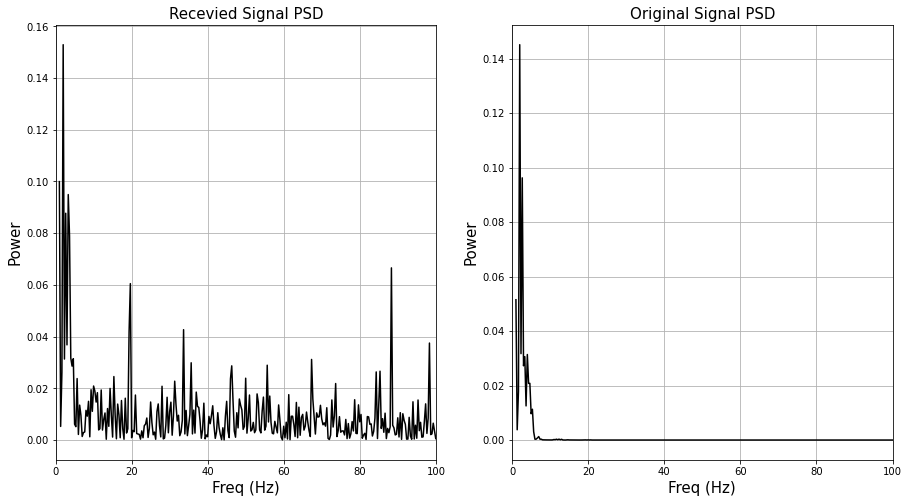

In [10]:
plt.figure(figsize = (15,8))
plt.plot(timevec , Signal , label = 'Received Signal' , c = 'grey')
plt.plot(timevec , signal_amp , label = 'Original Signal' , c='r')
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.title('Signal Representation in Time Domain' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.plot(hz , Signal_fft , label = 'Received Signal' , c = 'black')
plt.xlabel('Freq (Hz)' , fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.title('Recevied Signal PSD' , fontsize = 15)
plt.xlim([0,100])
plt.grid()

plt.subplot(1,2,2)
plt.plot(hz , sig_amp_fft  , c = 'black')
plt.xlabel('Freq (Hz)' , fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.title('Original Signal PSD' , fontsize = 15)
plt.xlim([0,100])
plt.grid()

In [11]:
# Gaussian Kernel:
fwhm = 25 
k = 100
gtime = 1000*np.arange(-k , k+1 )/sample_rate
gaus_win = np.exp(-4*(np.log(2)*gtime**2) / fwhm**2) 
gaus_win = gaus_win / np.sum(gaus_win)

In [12]:
filt_siganl_gaus_win_f_25 = np.convolve(Signal , gaus_win)
timevec_conv_f_25 = np.arange(0 - k/sample_rate , 3 + k/sample_rate , 1/sample_rate)

In [13]:
fwhm = 50 
k = 100
gtime = 1000*np.arange(-k , k+1 )/sample_rate
gaus_win = np.exp(-4*(np.log(2)*gtime**2) / fwhm**2) 
gaus_win = gaus_win / np.sum(gaus_win)

In [14]:
filt_siganl_gaus_win_f_50 = np.convolve(Signal , gaus_win)
timevec_conv_f_50 = np.arange(0 - k/sample_rate , 3 + k/sample_rate , 1/sample_rate)
Npnts_25 = len(timevec_conv_f_25)
Npnts_50 = len(timevec_conv_f_50)
hz_conv_25 = np.linspace(1,sample_rate , Npnts_25)
hz_conv_50 = np.linspace(1,sample_rate , Npnts_50)
Signal_fft_50 = np.abs(np.fft.fft(filt_siganl_gaus_win_f_50)/Npnts_50)**2
Signal_fft_25 = np.abs(np.fft.fft(filt_siganl_gaus_win_f_25)/Npnts_25)**2

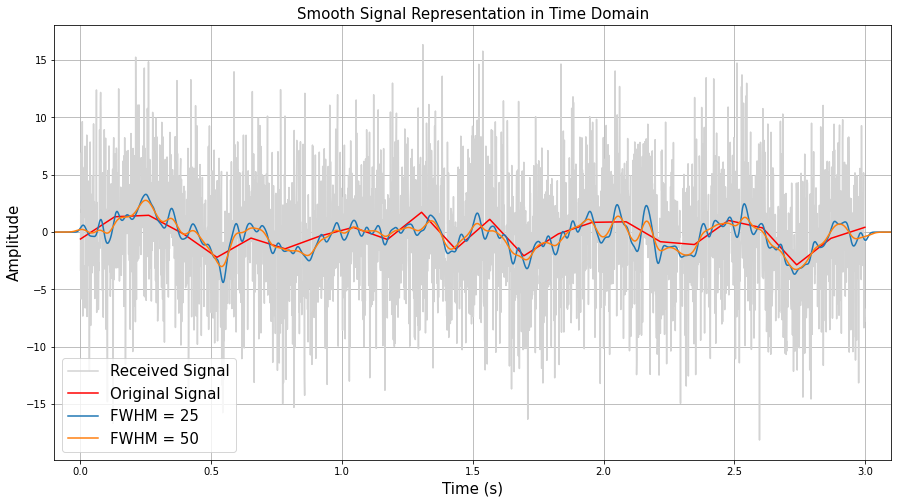

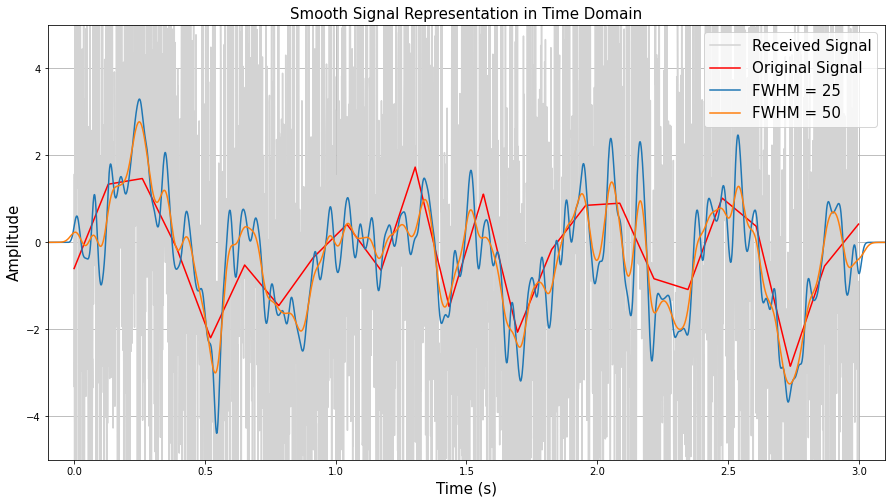

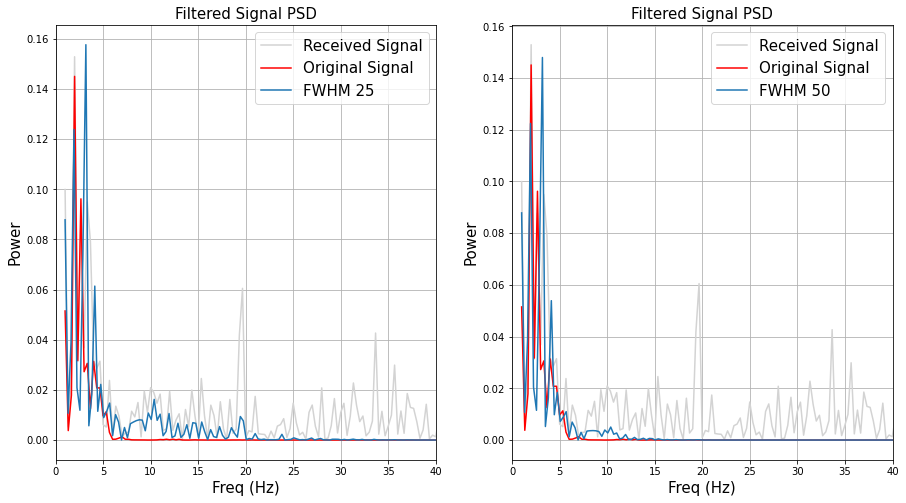

In [15]:
plt.figure(figsize = (15,8))
plt.plot(timevec , Signal , label = 'Received Signal' , c = 'lightgrey')
plt.plot(timevec , signal_amp , label = 'Original Signal' , c='r')
plt.plot(timevec_conv_f_25 , filt_siganl_gaus_win_f_25 , label = 'FWHM = {}'.format(25))
plt.plot(timevec_conv_f_50 , filt_siganl_gaus_win_f_50 , label = 'FWHM = {}'.format(50))
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.title('Smooth Signal Representation in Time Domain' , fontsize = 15)
plt.legend(fontsize = 15)
plt.xlim([-.1,3.1])
#plt.ylim([-5,5])
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(timevec , Signal , label = 'Received Signal' , c = 'lightgrey')
plt.plot(timevec , signal_amp , label = 'Original Signal' , c='r')
plt.plot(timevec_conv_f_25 , filt_siganl_gaus_win_f_25 , label = 'FWHM = {}'.format(25))
plt.plot(timevec_conv_f_50 , filt_siganl_gaus_win_f_50 , label = 'FWHM = {}'.format(50))
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.title('Smooth Signal Representation in Time Domain' , fontsize = 15)
plt.legend(fontsize = 15)
plt.xlim([-.1,3.1])
plt.ylim([-5,5])
plt.grid()


plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.plot(hz , Signal_fft , label = 'Received Signal' , c = 'lightgrey')
plt.plot(hz , sig_amp_fft  , label = 'Original Signal' , c = 'r')
plt.plot(hz_conv_25 , Signal_fft_25 , label = 'FWHM 25')
plt.xlabel('Freq (Hz)' , fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.title('Filtered Signal PSD' , fontsize = 15)
plt.xlim([0,40])
plt.legend(fontsize = 15)
plt.grid()

plt.subplot(1,2,2)
plt.plot(hz , Signal_fft , label = 'Received Signal' , c = 'lightgrey')
plt.plot(hz , sig_amp_fft  , label = 'Original Signal' , c = 'r')
plt.plot(hz_conv_50 , Signal_fft_50 , label = 'FWHM 50')
plt.xlabel('Freq (Hz)' , fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.title('Filtered Signal PSD' , fontsize = 15)
plt.legend(fontsize = 15)
plt.xlim([0,40])
plt.grid()

## 4. Convolution with frequency-domain Gaussian (narrowband filter)

In [16]:
sample_rate = 1000 
timevec = np.arange(0 , 3 , 1/sample_rate)
Npnts = len(timevec)
Poles = 40 
freq = 20 #Hz

y0 = 2*np.sin(2*np.pi*freq*np.linspace(0,1,Poles))
x0 = np.arange(0 , Poles)
x_test = np.linspace(1,Poles-1,Npnts)
signal_amp = interp1d(x0 , y0)(x_test)
Noise = 5*np.random.randn(Npnts)
Signal = signal_amp + Noise

hz = np.linspace(0,sample_rate , Npnts)
Signal_fft = np.abs(np.fft.fft(Signal)/Npnts)**2
Noise_fft = np.abs(np.fft.fft(Noise)/Npnts)**2
sig_amp_fft = np.abs(np.fft.fft(signal_amp)/Npnts)**2

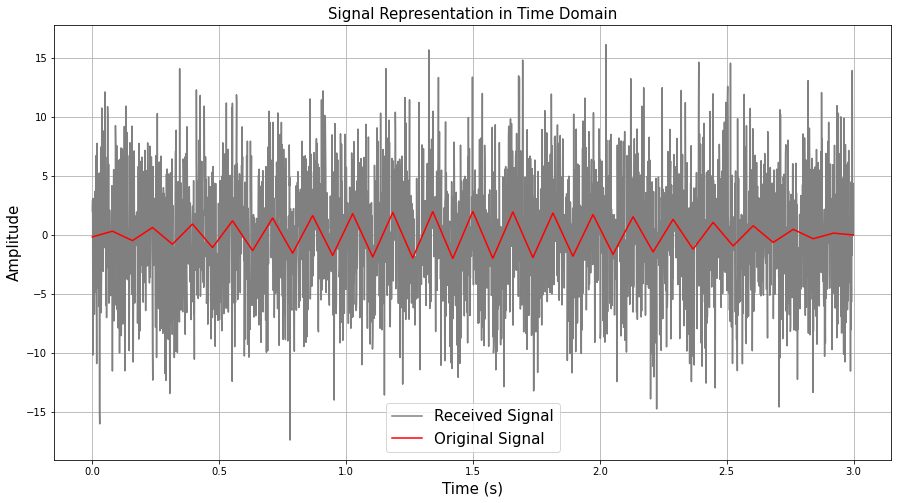

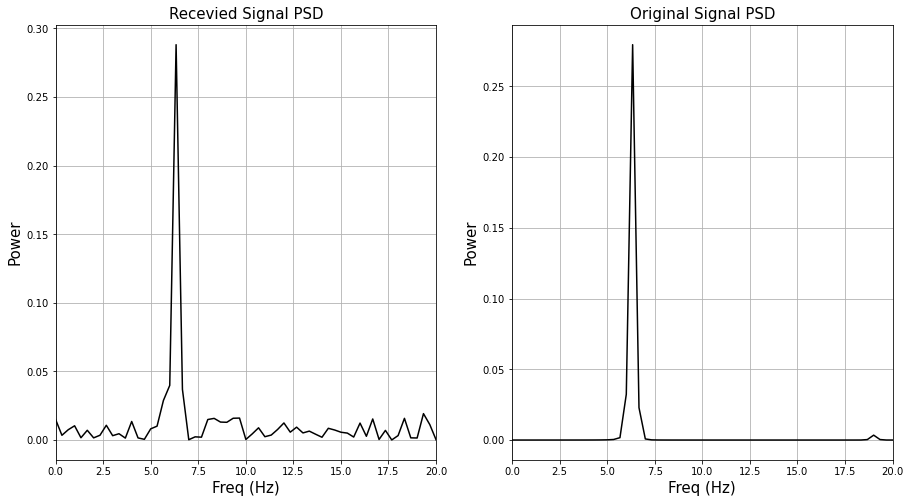

In [17]:
plt.figure(figsize = (15,8))
plt.plot(timevec , Signal , label = 'Received Signal' , c = 'grey')
plt.plot(timevec , signal_amp , label = 'Original Signal' , c='r')
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.title('Signal Representation in Time Domain' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.plot(hz , Signal_fft , label = 'Received Signal' , c = 'black')
plt.xlabel('Freq (Hz)' , fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.title('Recevied Signal PSD' , fontsize = 15)
plt.xlim([0,20])
plt.grid()

plt.subplot(1,2,2)
plt.plot(hz , sig_amp_fft  , c = 'black')
plt.xlabel('Freq (Hz)' , fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.title('Original Signal PSD' , fontsize = 15)
plt.xlim([0,20])
plt.grid()

In [18]:
# Gaussian Narrow-Band:
peak = 6 #Hz
fwhm = 1.5 # Hz
s = (fwhm * (2*np.pi*-1) ) / (4*np.pi)
g = np.exp(-0.5*((hz-peak)/s )**2) + np.exp(-0.5*((hz[::-1]-peak)/s )**2)
g = g / max(g)
g_ifft = np.real(np.fft.ifft(g))*Npnts
g_ifft = np.append(g_ifft[int(len(g)/2):] , g_ifft[:int(len(g)/2)] )
g = np.abs(np.fft.fft(g_ifft)/Npnts)

In [19]:
Signal_fft = np.abs(np.fft.fft(Signal)/Npnts)**2
filt_sig_fft = Signal_fft*g
filt_sig = 2*np.real(np.fft.ifft(filt_sig_fft))*Npnts
filt_sig = np.append(filt_sig[int(len(filt_sig_fft)/2):] , filt_sig[:int(len(filt_sig_fft)/2)] )

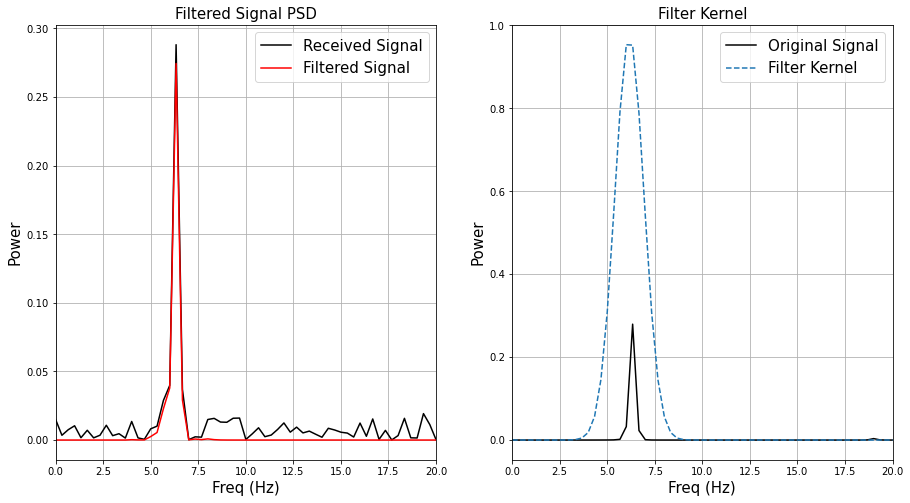

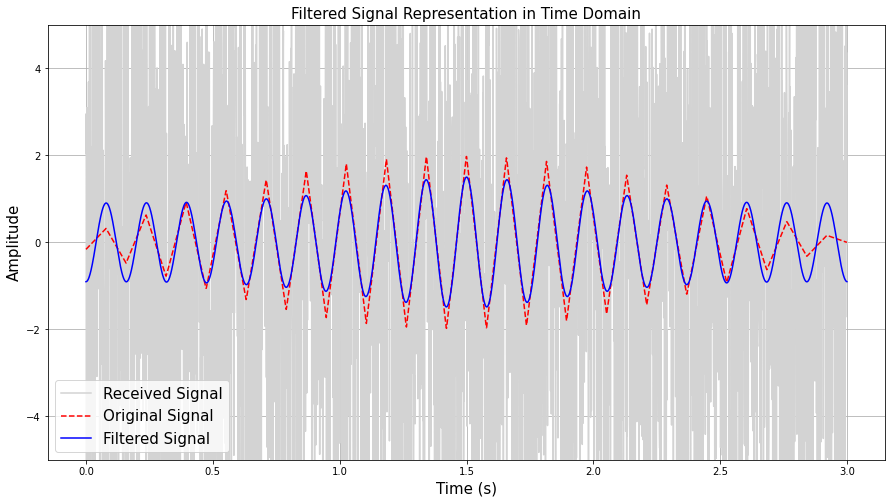

In [20]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.plot(hz , Signal_fft , label = 'Received Signal' , c = 'black')
plt.plot(hz , filt_sig_fft , label = 'Filtered Signal' , c = 'r')
plt.xlabel('Freq (Hz)' , fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.title('Filtered Signal PSD' , fontsize = 15)
plt.legend(fontsize = 15)
plt.xlim([0,20])
plt.grid()

plt.subplot(1,2,2)
plt.plot(hz , sig_amp_fft  , c = 'black' , label = 'Original Signal')
plt.plot(hz, g , label = 'Filter Kernel' , linestyle='dashed')
plt.xlabel('Freq (Hz)' , fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.title('Filter Kernel' , fontsize = 15)
plt.legend(fontsize = 15)
plt.xlim([0,20])
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(timevec , Signal , label = 'Received Signal' , c = 'lightgrey')
plt.plot(timevec , signal_amp , label = 'Original Signal' , c ='r' , linestyle = 'dashed')
plt.plot(timevec , filt_sig , label = 'Filtered Signal' , c ='b')
plt.plot()
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.title('Filtered Signal Representation in Time Domain' , fontsize = 15)
plt.ylim([-5 , 5])
plt.legend(fontsize = 15)
plt.grid()

## 5. Convolution with frequency-domain Planck taper (bandpass filter)

In [21]:
sample_rate = 3000 #Hz
timevec = np.arange(0, 2 , 1/sample_rate)
Npnts = len(timevec)
hz = np.linspace(0 , sample_rate , Npnts)
R = 10*np.random.randn(Npnts)
R_fft = np.abs(np.fft.fft(R)**2)/Npnts

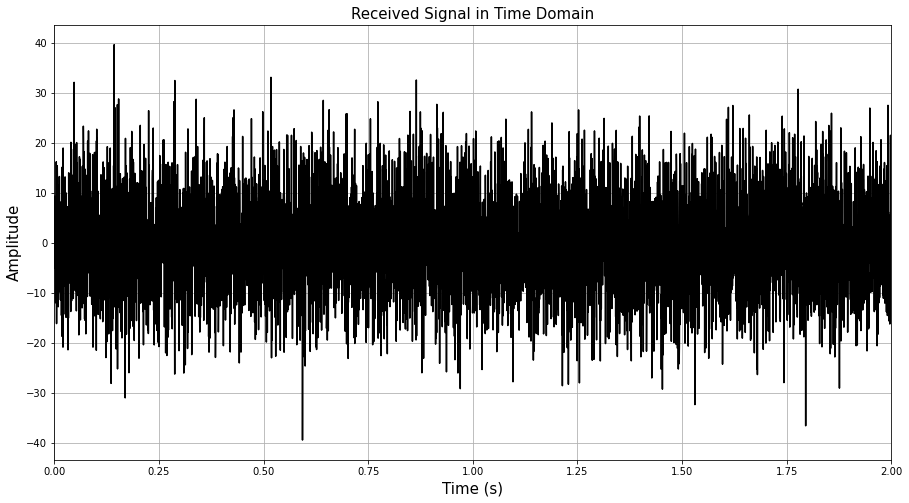

In [22]:
plt.figure(figsize = (15,8))
plt.plot(timevec , R , label = 'Received Signal' , c = 'black')
plt.xlim([0,2])
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.title('Received Signal in Time Domain' , fontsize = 15)
plt.grid()

We want to filter the signal using two different band-pass filter.
1. The first one is a common rectangular shape filter. 
2. And the second one is the planck taper window. 

In [23]:
start = 200 # Hz
stop = 400 #Hz

desired_psd = np.append(np.zeros(np.argmin(np.abs(hz-start))) , np.ones(np.argmin(np.abs(hz-(stop-start) ))))
desired_psd = np.append(desired_psd , np.zeros(len(hz)-len(desired_psd)))
desired_psd = desired_psd + desired_psd[::-1]

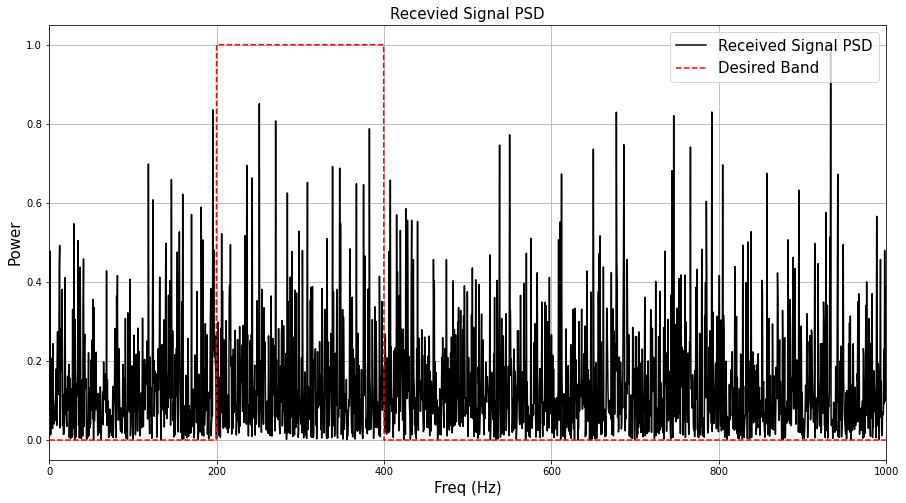

In [24]:
plt.figure(figsize = (15,8))
plt.plot(hz , R_fft/max(R_fft) , label = 'Received Signal PSD' , c = 'black')
plt.plot(hz , desired_psd , label = 'Desired Band' , c = 'r' , linestyle = 'dashed')
plt.xlabel('Freq (Hz)' , fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.title('Recevied Signal PSD' , fontsize = 15)
plt.xlim([0,1000])
plt.legend(fontsize = 15)
plt.grid()

In [25]:
# Rect: 
rect = 2*np.real(np.fft.ifft(desired_psd)/Npnts)
rect = np.append( rect[int(Npnts/2):] , rect[:int(Npnts/2)] )
rect = rect / np.max(rect)

In [26]:
# Planck Taper - eps=0.15: 
eps = 0.15 
trans_1  = int(np.floor((1-eps)*np.argmin(np.abs(hz-start))))
start_pl = np.argmin(np.abs(hz-start)) - trans_1 
trans_2 = np.argmin(np.abs(hz-(stop-start))) #- start_pl
stop_pl  = int(np.floor((1+eps)* np.argmin(np.abs(hz-(stop -start) )) )) - trans_2
np.exp(np.linspace(-20,1))

planc_psd = np.append(np.zeros(trans_1) , np.exp(np.linspace(-1.5/eps,0 , start_pl)) )
planc_psd = np.append(planc_psd         , np.ones(trans_2))
planc_psd = np.append(planc_psd         , np.exp(np.linspace(-1.5/eps,0 , stop_pl))[::-1] )
planc_psd = np.append(planc_psd         , np.zeros(len(hz) - len(planc_psd)))
planc_psd_15 = planc_psd + planc_psd[::-1] 

planc_15 = 2*np.real(np.fft.ifft(planc_psd_15)/Npnts)
planc_15 = np.append( planc_15[int(Npnts/2):] , planc_15[:int(Npnts/2)] )
planc_15 = planc_15 / np.max(planc_15)

In [28]:
# Planck Taper - eps=0.5: 
eps = 0.5 
trans_1  = int(np.floor((1-eps)*np.argmin(np.abs(hz-start))))
start_pl = np.argmin(np.abs(hz-start)) - trans_1 
trans_2 = np.argmin(np.abs(hz-(stop-start))) #- start_pl
stop_pl  = int(np.floor((1+eps)* np.argmin(np.abs(hz-(stop -start) )) )) - trans_2
np.exp(np.linspace(-20,1))

planc_psd = np.append(np.zeros(trans_1) , np.exp(np.linspace(-1.5/eps,0 , start_pl)) )
planc_psd = np.append(planc_psd         , np.ones(trans_2))
planc_psd = np.append(planc_psd         , np.exp(np.linspace(-1.5/eps,0 , stop_pl))[::-1] )
planc_psd = np.append(planc_psd         , np.zeros(len(hz) - len(planc_psd)))
planc_psd_50 = planc_psd + planc_psd[::-1] 

planc_50 = 2*np.real(np.fft.ifft(planc_psd_50)/Npnts)
planc_50 = np.append( planc_50[int(Npnts/2):] , planc_50[:int(Npnts/2)] )
planc_50 = planc_50 / np.max(planc_50)

In [29]:
R_filt_rect_fft = R_fft * desired_psd

R_filt_planc_15_fft = R_fft * planc_psd_15

R_filt_planc_50_fft = R_fft * planc_psd_50

R_filt_rect = 2*np.real(np.fft.ifft(R_filt_rect_fft)/Npnts)
R_filt_rect = np.append( R_filt_rect[int(Npnts/2):] , R_filt_rect[:int(Npnts/2)] )

R_filt_planc_15 = 2*np.real(np.fft.ifft(R_filt_planc_15_fft)/Npnts)
R_filt_planc_15 = np.append( R_filt_planc_15[int(Npnts/2):] , R_filt_planc_15[:int(Npnts/2)] )

R_filt_planc_50 = 2*np.real(np.fft.ifft(R_filt_planc_50_fft)/Npnts)
R_filt_planc_50 = np.append( R_filt_planc_50[int(Npnts/2):] , R_filt_planc_50[:int(Npnts/2)] )

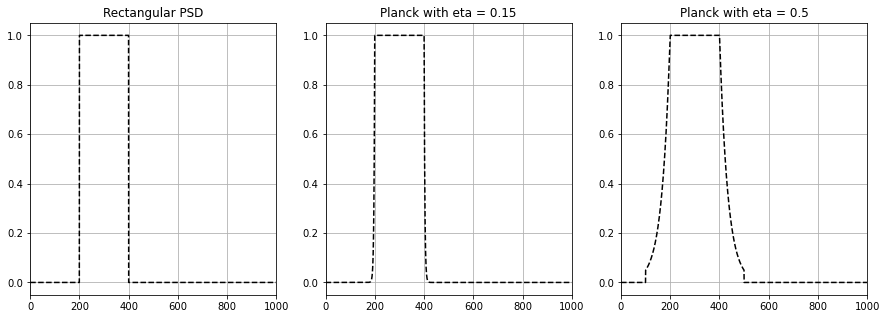

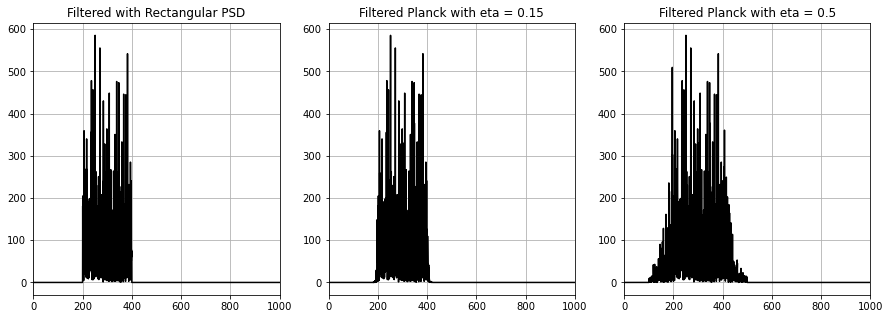

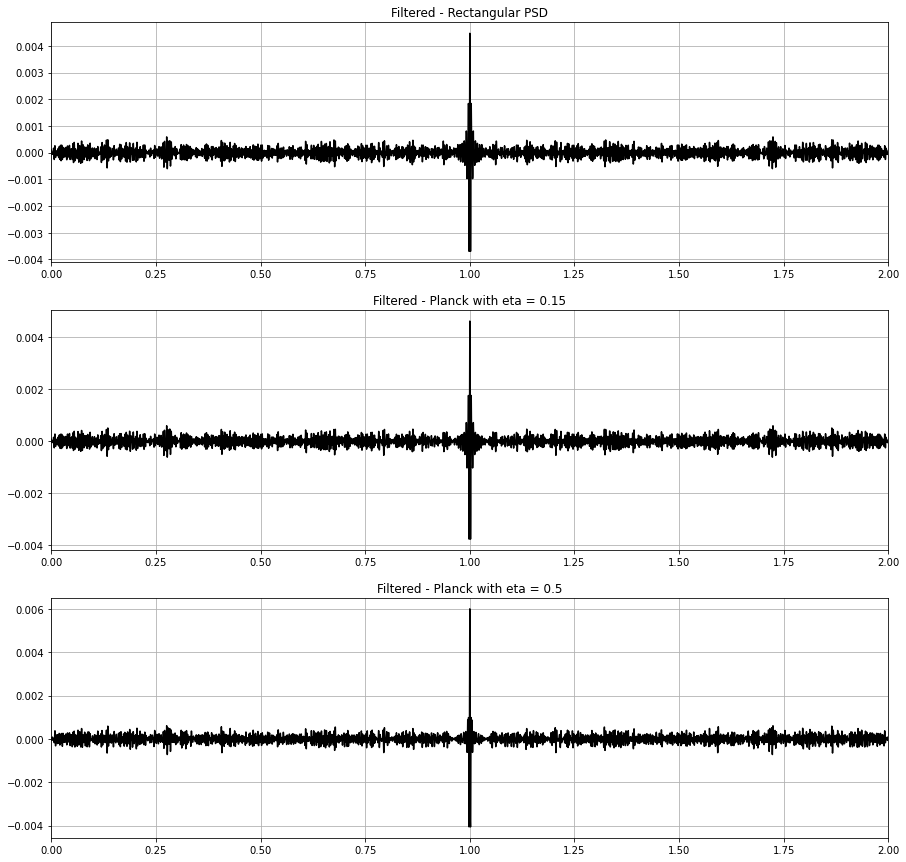

In [30]:
###########################################
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.plot(hz , desired_psd , c='black' , linestyle = 'dashed')
plt.title('Rectangular PSD')
plt.xlim([0,1000])
plt.grid()

plt.subplot(1,3,2)
plt.plot(hz , planc_psd_15  , c='black' , linestyle = 'dashed')
plt.title('Planck with eta = 0.15')
plt.xlim([0,1000])
plt.grid()

plt.subplot(1,3,3)
plt.plot(hz , planc_psd_50 , c='black' , linestyle = 'dashed')
plt.title('Planck with eta = 0.5')
plt.xlim([0,1000])
plt.grid()

#############################
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.plot(hz , R_filt_rect_fft , c='black')
plt.title('Filtered with Rectangular PSD')
plt.xlim([0,1000])
plt.grid()

plt.subplot(1,3,2)
plt.plot(hz , R_filt_planc_15_fft , c='black')
plt.title('Filtered Planck with eta = 0.15')
plt.xlim([0,1000])
plt.grid()

plt.subplot(1,3,3)
plt.plot(hz , R_filt_planc_50_fft , c='black')
plt.title('Filtered Planck with eta = 0.5')
plt.xlim([0,1000])
plt.grid()


#############################
plt.figure(figsize = (15,15))
plt.subplot(3,1,1)
plt.plot(timevec , R_filt_rect , c='black')
plt.title('Filtered - Rectangular PSD')
plt.xlim([0,2])
plt.grid()

plt.subplot(3,1,2)
plt.plot(timevec , R_filt_planc_15 , c='black')
plt.title('Filtered - Planck with eta = 0.15')
plt.xlim([0,2])
plt.grid()

plt.subplot(3,1,3)
plt.plot(timevec , R_filt_planc_50 , c='black')
plt.title('Filtered - Planck with eta = 0.5')
plt.xlim([0,2])
plt.grid()